In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\MY PORTFOLIO\\Github")

In [3]:
df=pd.read_csv("Admission_Predict.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [5]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [6]:
df.Research = df.Research.astype(object)

In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [8]:
df.drop('Serial No.', axis = 1, inplace = True)

In [9]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ED6AA18>,
      dtype=object)

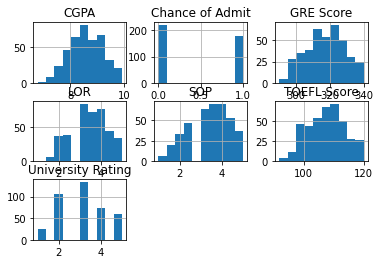

In [10]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F7F98B0>,
      dtype=object)

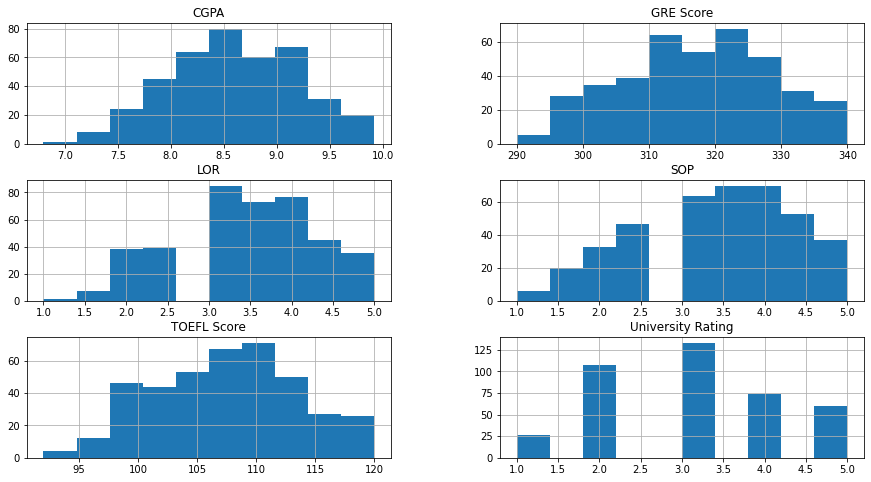

In [11]:
plt.rcParams['figure.figsize'] = [15,8]
df.drop('Chance of Admit', axis = 1).hist()

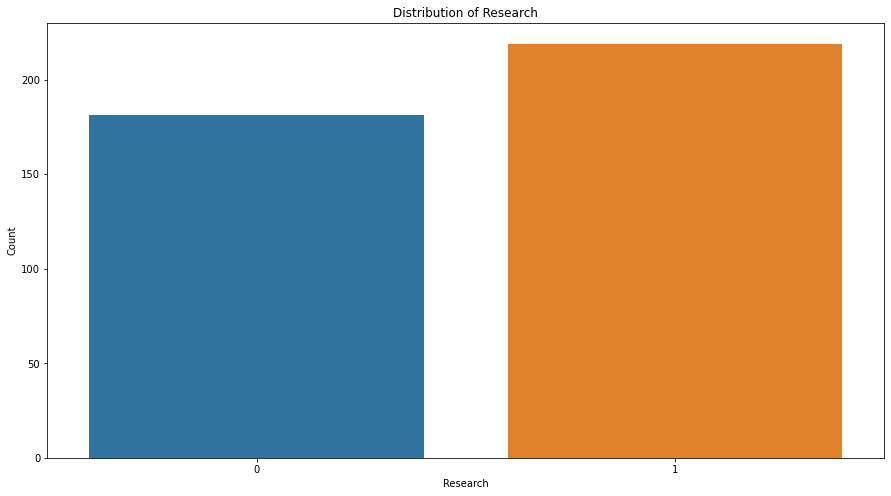

In [12]:
sns.countplot(df['Research'])

plt.title("Distribution of Research")
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

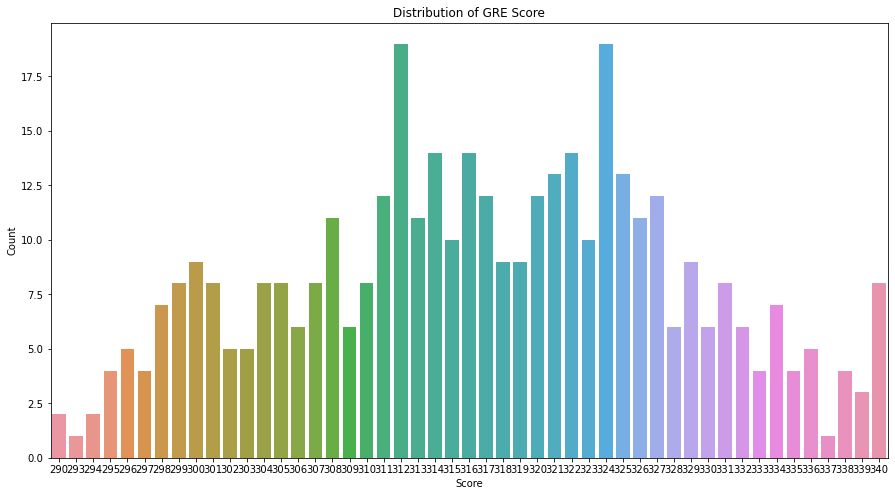

In [13]:
sns.countplot(df['GRE Score'])

plt.title("Distribution of GRE Score")
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [14]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
df.isnull().sum()*100/df.shape[0]

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [16]:
df_target = df['Chance of Admit']
df_features = df.drop('Chance of Admit', axis = 1)

In [17]:
df_target

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit, Length: 400, dtype: int64

In [18]:
df_target.shape

(400,)

In [19]:
df_features.shape

(400, 7)

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_features,df_target, random_state = 1, test_size = 0.2)

In [21]:
X_train.shape

(320, 7)

In [22]:
X_test.shape

(80, 7)

In [23]:
y_train.shape

(320,)

In [24]:
y_test.shape

(80,)

In [25]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier(max_depth = 3)
model_DT = model_tree.fit(X_train, y_train)

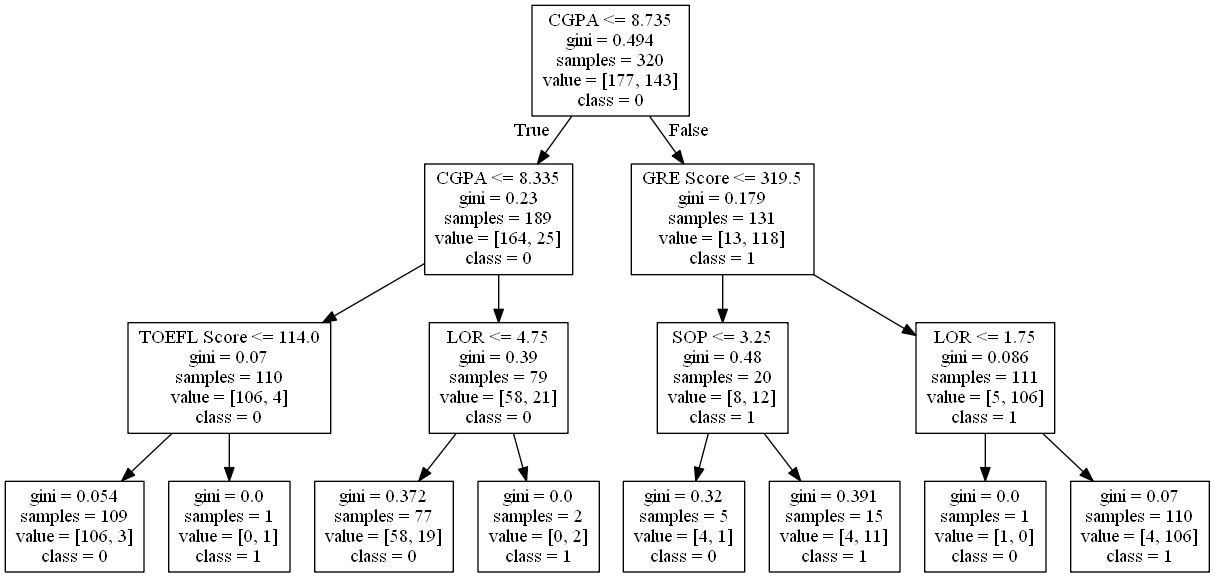

In [26]:
import graphviz
import pydotplus

from IPython.display import Image

labels = X_train.columns

tree_viz = tree.export_graphviz(model_DT, feature_names = labels, class_names = ["0","1"])

graph = pydotplus.graph_from_dot_data(tree_viz)
Image(graph.create_png())

In [27]:
model_DT

DecisionTreeClassifier(max_depth=3)

In [28]:
train_pred = model_DT.predict(X_train)
test_pred = model_DT.predict(X_test)

In [29]:
train_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [30]:
test_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, train_pred)


In [32]:
print(train_cm)


[[169   8]
 [ 23 120]]


In [33]:
accuracy_train = (train_cm[0,0]+train_cm[1,1])/(train_cm[0,0]+train_cm[0,1]+train_cm[1,0]+train_cm[1,1])
print(accuracy_train)

0.903125


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,train_pred)

0.903125

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [36]:
precision_score(y_train, train_pred)

0.9375

In [37]:
recall_score(y_train,train_pred)

0.8391608391608392

In [38]:
# Confusion matrix test data
test_cm = confusion_matrix(y_test, test_pred)
print(test_cm)

[[39  4]
 [ 5 32]]


In [39]:
# test data accuracy
accuracy_score(y_test,test_pred)

0.8875

In [40]:
precision_score(y_test,test_pred)

0.8888888888888888

In [41]:
recall_score(y_test,test_pred)

0.8648648648648649

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_classifier = RandomForestClassifier(n_estimators = 3) # this is being done to get 3 Samples(Boot Strap Models)

In [44]:
rf_model = rf_classifier.fit(X_train,y_train)

In [45]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

### Train performance

In [46]:
print('Confusion Matrix:', confusion_matrix(y_train_pred,y_train))

Confusion Matrix: [[169   9]
 [  8 134]]


In [47]:
print('Accuracy Score:', accuracy_score(y_train_pred,y_train))
print('Precision Score:', precision_score(y_train_pred,y_train))
print('Recall Score:', recall_score(y_train_pred,y_train))

Accuracy Score: 0.946875
Precision Score: 0.9370629370629371
Recall Score: 0.9436619718309859


### Test performance

In [48]:
print('Confusion Matrix:', confusion_matrix(y_test_pred,y_test))
print('Accuracy Score:', accuracy_score(y_test_pred,y_test))
print('Precision Score:', precision_score(y_test_pred,y_test))
print('Recall Score:', recall_score(y_test_pred,y_test))

Confusion Matrix: [[36  5]
 [ 7 32]]
Accuracy Score: 0.85
Precision Score: 0.8648648648648649
Recall Score: 0.8205128205128205


In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [50]:
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

In [51]:
fpr,tpr,th = roc_curve(y_test,y_pred_proba)

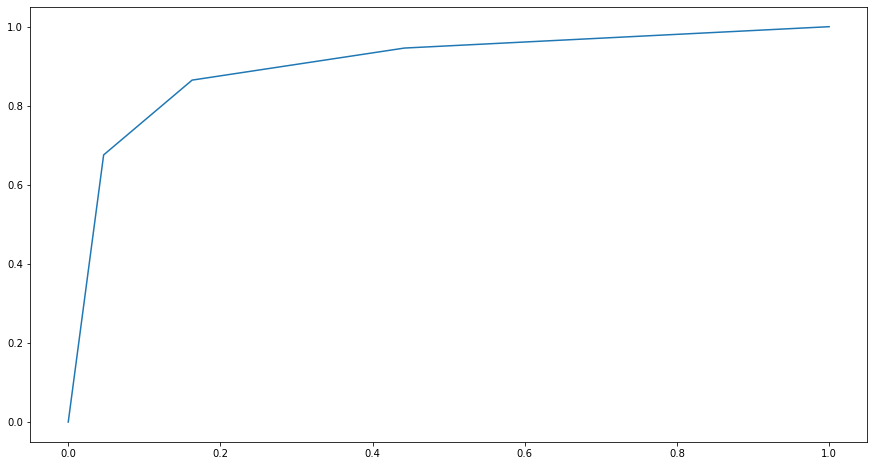

In [52]:
plt.plot(fpr, tpr)

In [53]:
print("AUC Score:",auc(fpr,tpr))

AUC Score: 0.9010056568196103
